<a href="https://colab.research.google.com/github/lwehausen/Python/blob/main/Lahman_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A data analysis and data visualization using the Teams, Batting, Pitching, and People data frames in the Lahman package.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")

In [ ]:
Batting = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Batting.csv")

In [ ]:
People = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/People.csv")

In [ ]:
Pitching = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Pitching.csv")

Create a data frame that is a subset of the Teams data
frame that contains only the years from 2000 through 2009 and the
variables yearID, W, and L.

In [ ]:
teams2 = Teams.loc[(Teams["yearID"] < 2010) & (Teams["yearID"] > 1999)]
teams2 = teams2[["yearID", "W", "L"]]
teams2.head(5)

,yearID,W,L
2325,2000,82,80
2326,2000,85,77
2327,2000,95,67
2328,2000,74,88
2329,2000,85,77


How many years did the Chicago Cubs (teamID is “CHN”)
hit at least 200 HRs in a season and what was the median number
of wins in those seasons?

In [ ]:
teams4 = Teams.loc[(Teams["teamID"] == "CHN")]
teams5 = teams4.loc[(teams4["HR"] > 199)]
teams6 = teams5[["teamID", "yearID", "HR", "W"]]
test = teams6.sort_values(["W"], ascending=[False])
test

,teamID,yearID,HR,W
2840,CHN,2017,223,92
2271,CHN,1998,212,90
2451,CHN,2004,235,89
2900,CHN,2019,256,84
1974,CHN,1987,209,76
2960,CHN,2021,210,71
2391,CHN,2002,200,67


The Cubs hit at least 200 HRs in 7 different years. The median amount of wins for these 7 years was 84.

Create a factor called election that divides the yearID into 4-year blocks that correspond to U.S. presidential terms; first term started in 1788. During which term have the most HRs been hit? Create a plot to answer this question.

<ipython-input-128-362ed5895c81>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams8['term'] = pd.cut(teams8['yearID'], bins=bins, include_lowest=True, precision=0)
<ipython-input-128-362ed5895c81>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams8['term'] = teams8['yearID'].astype("str")
<ipython-input-128-362ed5895c81>:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


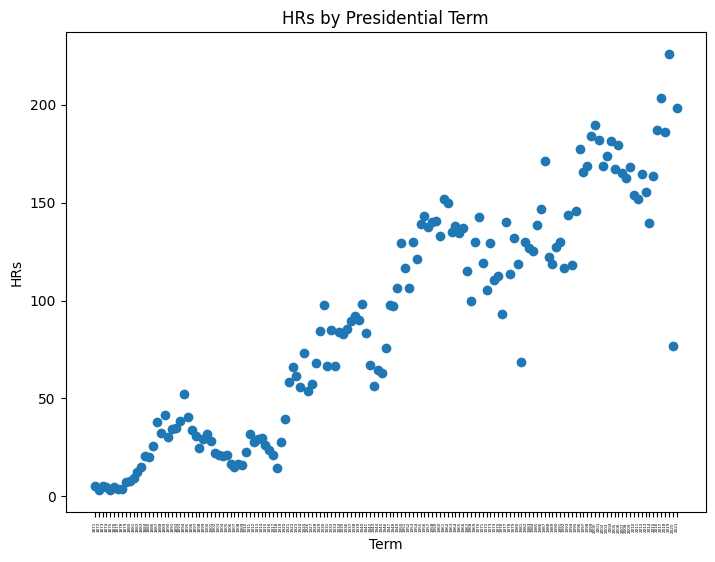

In [ ]:
term_length = 4
start_yr = 1788
end_yr = 2021
teams7 = Teams[(Teams["yearID"] >= 1788) & (Teams["yearID"] <= 2021)]
teams8 = teams7[["yearID", "HR"]]

#To make sure 2021 is included in this since python indexing is weird:
yr_range = end_yr - start_yr
modulo = yr_range % term_length

if modulo == 0:
    final_start = end_yr - term_length
else:
    final_start = end_yr - modulo
final_end = end_yr + 1

#Create a list of the starting years
start = np.arange(start_yr, final_start, term_length).tolist()

#Create lists of tuples, with each tuple being a term
tuples = [(start, start+term_length) for start in start]
#Add the last tuple including 2021
tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed="left")

#Assign each row to a period
teams8["term"] = pd.cut(teams8["yearID"], bins=bins, include_lowest=True, precision=0)
teams8["term"] = teams8["yearID"].astype("str")

#Group the data by term column
teams9 = teams8.groupby("term").mean().reset_index().drop("yearID", axis=1)
teams9.head(3)

#Create scatter plot to see which term had the most HRs:
myplot = plt.figure()
ax = myplot.add_axes([0,0,1,1])
ax.scatter(teams9["term"], teams9["HR"])
#Amend x-axis
plt.xticks(rotation="vertical")
plt.title("HRs by Presidential Term")
x = np.linspace(1788, 2021, 100000000)
plt.xlabel("Term")
plt.ylabel("HRs")
#Set parameters for tick labels
plt.tick_params(axis="x", which="major", labelsize=3)
plt.tight_layout()

#Print plot of Number of HRs by Presidential Term
plt.show()

Based on this plot, it appears the most HRs were hit during the 2016-2020 term, which corresponds to the 45th presidential term.

Make a line plot of total home runs per season and stratify
by league. Remove observations where league is missing.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


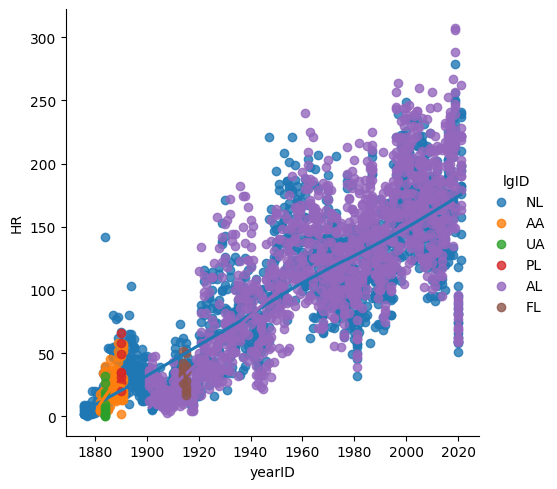

In [ ]:
#Remove observations where league is missing:
Teams.dropna(subset=["lgID"])

#Plotting a data frame
import seaborn as sns

sns.lmplot(x = "yearID", y = "HR", hue = "lgID", data = Teams, lowess = True)

Create an indicator variable called “winning record” which
is defined as TRUE if the number of wins is greater than the number
of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs
Runs against (RA) with the color of each point showing whether that
team had a winning record or not.

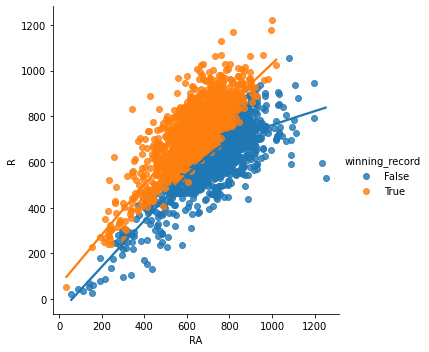

In [ ]:
#Create indicator var "winning_record"
Teams["winning_record"] = (Teams["W"] >= Teams["L"].astype(int))

#Create a scatter plot of R vs RA with color of each point indicating winning record or not
sns.lmplot(x = "RA", y = "R", hue = "winning_record", data = Teams, lowess = True)

Use the Batting, Pitching, and Master tables in the Lahman package to
answer the following questions:

Name every player in baseball history who has accumulated at least 300 home runs (HR) and at least 300 stolen bases (SB).
You can find the first and last name of the player in the Master data
frame. Join this to your result along with the total home runs and
total bases stolen for each of these elite players.

In [ ]:
#Group by playerID, then sum HR and SB for each playerID.
batting2 = Batting.groupby(["playerID"])["HR", "SB"].sum()

#Find every playerID that has >= 300 HR & >= 300 SB.
batting3 = batting2.loc[(batting2["HR"] > 299) & (batting2["SB"] > 299)]

#Merge batting3 with People df to get names of players from their playerID
merg = pd.merge(People, batting3, on = "playerID", how = "inner")
merg.loc[:,["HR", "SB", "nameFirst", "nameLast"]]

<ipython-input-132-0ba8b242fe05>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  batting2 = Batting.groupby(["playerID"])["HR", "SB"].sum()


,HR,SB,nameFirst,nameLast
0,435,312.0,Carlos,Beltran
1,762,514.0,Barry,Bonds
2,332,461.0,Bobby,Bonds
3,438,314.0,Andre,Dawson
4,304,320.0,Steve,Finley
5,660,338.0,Willie,Mays
6,696,329.0,Alex,Rodriguez
7,305,304.0,Reggie,Sanders


Similarly, name every pitcher in baseball history who has
accumulated at least 300 wins (W) and at least 3,000 strikeouts (SO).

In [ ]:
#Group by playerID then sum W and SO for each playerID
pitching2 = Pitching.groupby(["playerID"])["W", "SO"].sum()

#Gind every playerID that has >= 300 W & >= 3000 SO
pitching3 = pitching2.loc[(pitching2["W"] > 299) & (pitching2["SO"] > 2999)]

#Merge pitching3 with People df to get names of players from their playerID
merg2 = pd.merge(People, pitching3, on = "playerID", how = "inner")
merg2.loc[:,["W", "SO", "nameFirst", "nameLast"]]

<ipython-input-133-1940ce0b9ca7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pitching2 = Pitching.groupby(["playerID"])["W", "SO"].sum()


,W,SO,nameFirst,nameLast
0,329,4136,Steve,Carlton
1,354,4672,Roger,Clemens
2,303,4875,Randy,Johnson
3,417,3509,Walter,Johnson
4,355,3371,Greg,Maddux
5,318,3342,Phil,Niekro
6,314,3534,Gaylord,Perry
7,324,5714,Nolan,Ryan
8,311,3640,Tom,Seaver
9,324,3574,Don,Sutton


Identify the name and year of every player who has hit at
least 50 home runs in a single season. Which player had the lowest
batting average in that season?

In [ ]:
#Find every playerID that hit >= 50 HR in a season
#Dataset has one record for each stint; combine the rows of the stints

#Set batting4 = pd.DataFrame(batting[vars]).groupby(player and year).sum("hr"), then do hr > 49, then merge
batting4 = Batting.loc[(Batting["HR"] > 49)]
batting4.groupby(["stint"])
#Groupby yearID and playerID?
batting4.loc[:,["playerID", "yearID", "HR", "stint", "teamID", "H", "AB"]]

#Merge batting4 with People to get names from playerID, then create new variable that is batting average (BA) = hits(H)/at_bats(AB)
#Sort BA values by lowest-highest
merg3 = pd.merge(People, batting4, on = "playerID", how = "inner")
merg3["BA"] = merg3["H"]/merg3["AB"]
merg3.loc[:,["nameFirst", "nameLast", "yearID", "HR", "BA"]].sort_values(["BA"], ascending = [True])

,nameFirst,nameLast,yearID,HR,BA
0,Pete,Alonso,2019,53,0.259631
2,Jose,Bautista,2010,54,0.260105
16,Andruw,Jones,2005,51,0.262799
22,Roger,Maris,1961,61,0.269492
43,Greg,Vaughn,1998,50,0.272251
6,Cecil,Fielder,1990,51,0.277487
27,Mark,McGwire,1999,65,0.278311
41,Giancarlo,Stanton,2017,59,0.281407
17,Aaron,Judge,2017,52,0.284133
14,Ken,Griffey,1998,56,0.284360


Pete Alonso had the lowest BA amongst these players.

The team IDs corresponding to Brooklyn baseball teams from the Teams
data frame are listed:
"BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF".
Use map int() to find the number of seasons in which each of those teams played by calling a function called count seasons.

In [136]:
bk_teams = ["BR1", "BR2", "BR3", "BR4", "BRO", "BRP", "BRF"]

In [137]:
def count_seasons(teamID):
  return(len(Teams.loc[(Teams["teamID"]== teamID)]))

output = list(map(count_seasons, bk_teams))
print(output)

[1, 4, 6, 1, 68, 1, 2]
